In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
drugcomb = pd.read_pickle("drugcomb_preprocessed.pkl")

In [24]:
print("Shape:", drugcomb.shape)
print("\nInfo:")
print(drugcomb.info())
print("\nMissing values:")
print(drugcomb.isna().sum())

Shape: (561754, 54)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 561754 entries, 0 to 739912
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   drug_row                                 561754 non-null  object 
 1   drug_col                                 561754 non-null  object 
 2   cell_line_name                           561754 non-null  object 
 3   synergy_zip                              561754 non-null  float64
 4   synergy_loewe                            561754 non-null  object 
 5   synergy_hsa                              561754 non-null  float64
 6   synergy_bliss                            561754 non-null  float64
 7   ic50_row                                 561754 non-null  float64
 8   ic50_col                                 561754 non-null  float64
 9   ri_row                                   561754 non-null  float64
 10  ri_col    

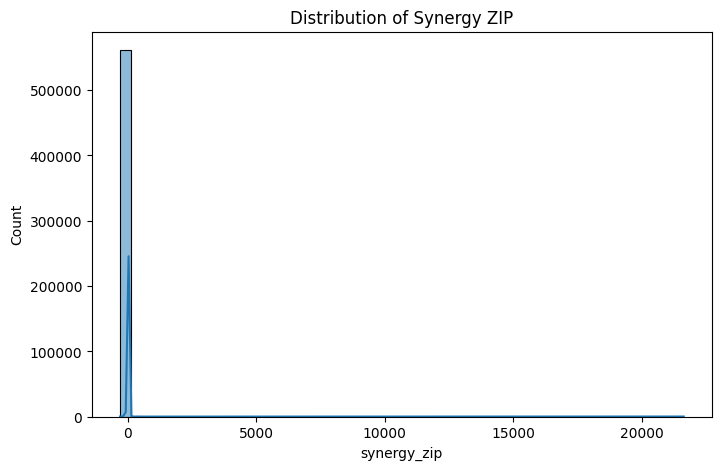

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(drugcomb["synergy_zip"], kde=True, bins=50)
plt.title("Distribution of Synergy ZIP")
plt.show()

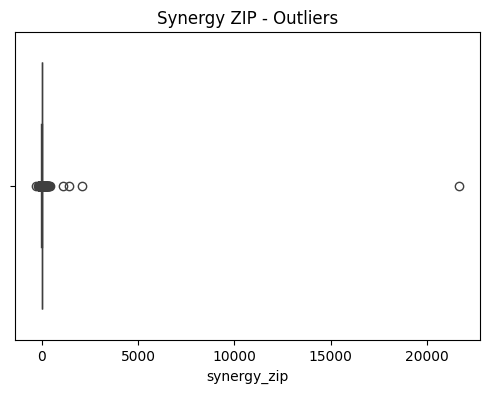

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=drugcomb["synergy_zip"])
plt.title("Synergy ZIP - Outliers")
plt.show()

In [27]:
numeric_cols_to_cap = ['synergy_zip', 'ic50_row', 'ic50_col', 'ri_row', 'ri_col']

for col in numeric_cols_to_cap:
    Q1 = drugcomb[col].quantile(0.25)
    Q3 = drugcomb[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap in-place
    drugcomb[col] = drugcomb[col].clip(lower, upper)

In [28]:
print("Unique drugs in row:", drugcomb["drug_row"].nunique())
print("Unique drugs in col:", drugcomb["drug_col"].nunique())
unique_all = pd.unique(pd.concat([drugcomb["drug_row"], drugcomb["drug_col"]]))
print("Total unique drugs overall:", len(unique_all))

Unique drugs in row: 2883
Unique drugs in col: 2038
Total unique drugs overall: 3298


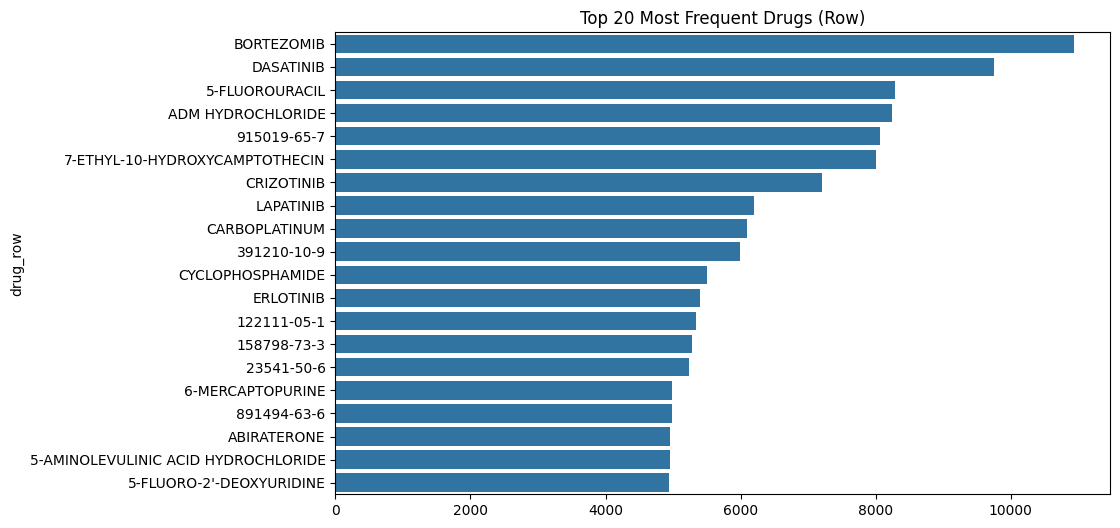

In [29]:
top_drugs = drugcomb["drug_row"].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.title("Top 20 Most Frequent Drugs (Row)")
plt.show()

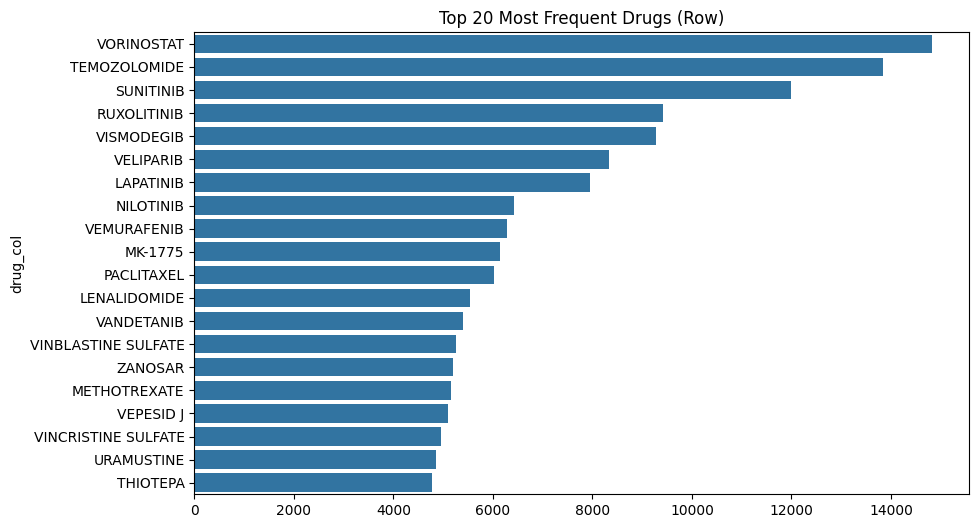

In [30]:
top_drugs = drugcomb["drug_col"].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.title("Top 20 Most Frequent Drugs (Row)")
plt.show()

In [31]:
# Recreate cancer_type
cancer_cols = [col for col in drugcomb.columns if col.startswith("cancer_type_")]
drugcomb["cancer_type"] = drugcomb[cancer_cols].idxmax(axis=1).str.replace("cancer_type_", "")

# Recreate tissue_name
tissue_cols = [col for col in drugcomb.columns if col.startswith("tissue_name_")]
drugcomb["tissue_name"] = drugcomb[tissue_cols].idxmax(axis=1).str.replace("tissue_name_", "")


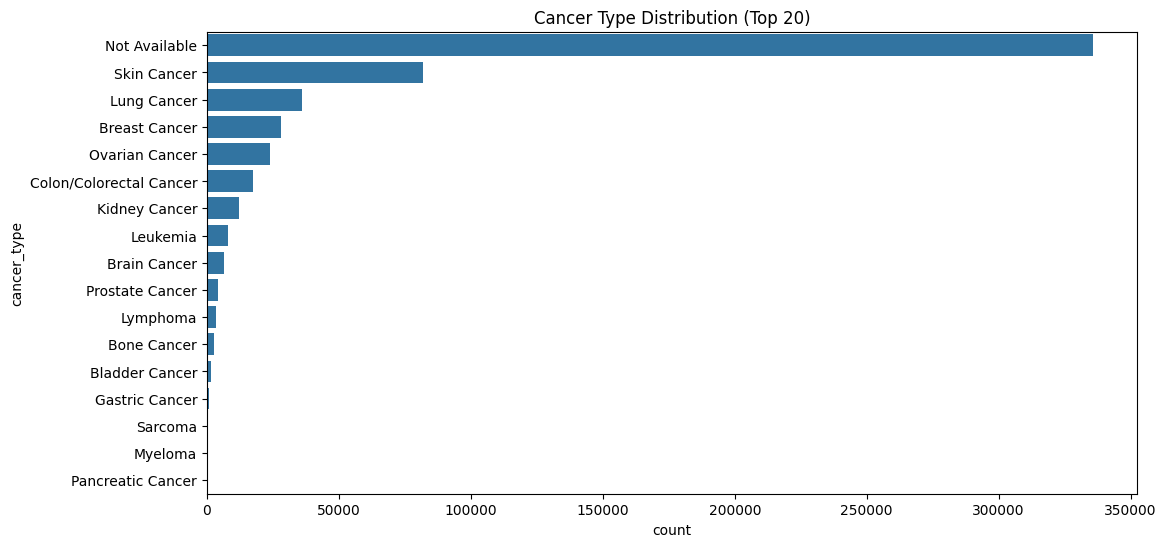

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(y="cancer_type", data=drugcomb, 
              order=drugcomb["cancer_type"].value_counts().index[:20])
plt.title("Cancer Type Distribution (Top 20)")
plt.show()


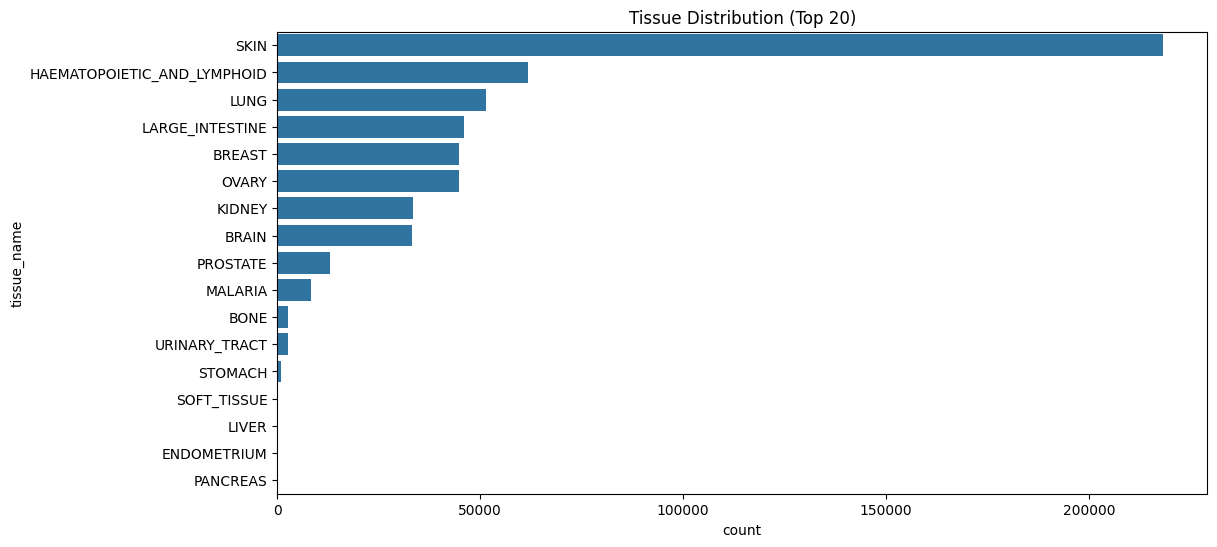

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(y="tissue_name", data=drugcomb, 
              order=drugcomb["tissue_name"].value_counts().index[:20])
plt.title("Tissue Distribution (Top 20)")
plt.show()

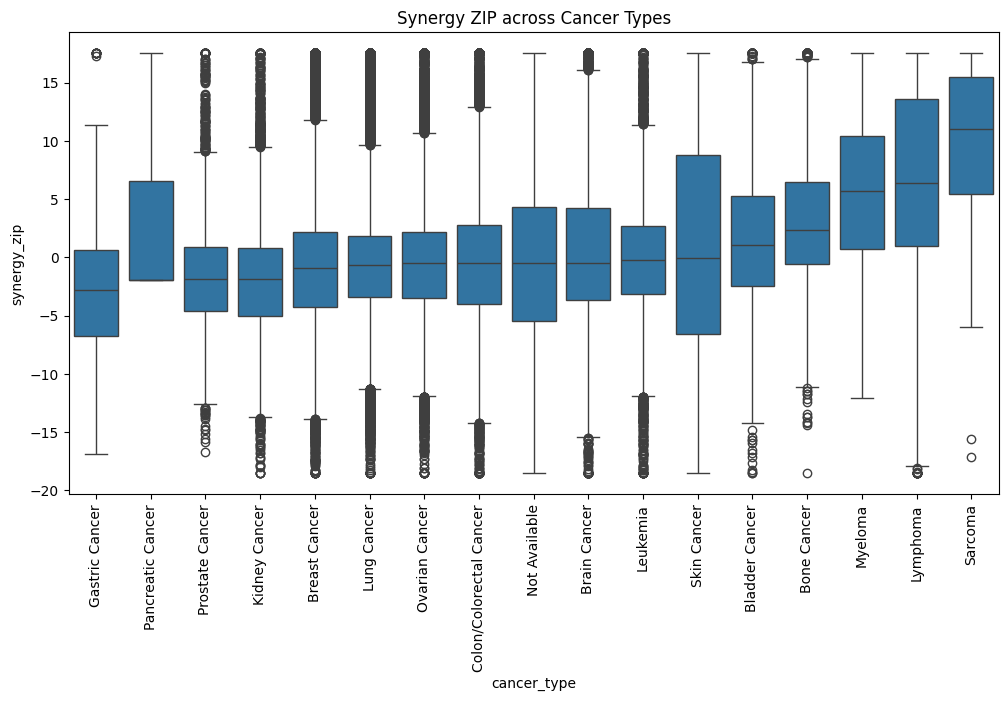

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cancer_type", y="synergy_zip", data=drugcomb,
            order=drugcomb.groupby("cancer_type")["synergy_zip"].median().sort_values().index)
plt.xticks(rotation=90)
plt.title("Synergy ZIP across Cancer Types")
plt.show()

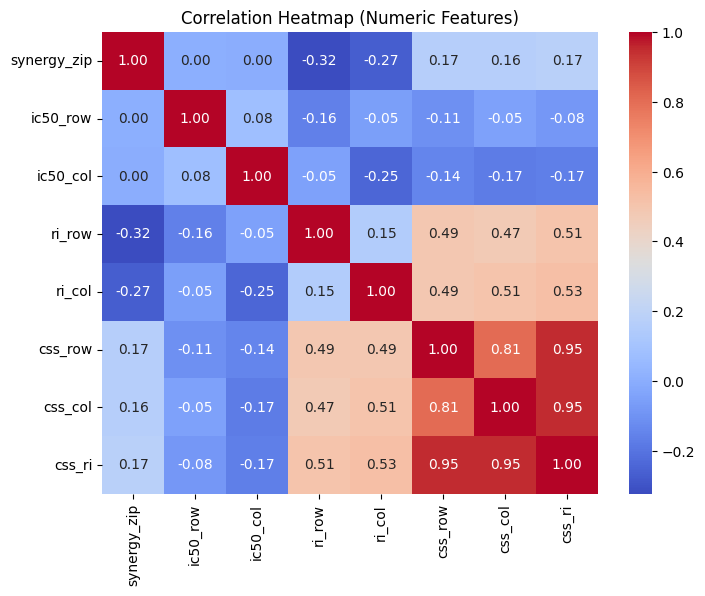

In [35]:
numeric_cols = ["synergy_zip", "ic50_row", "ic50_col", "ri_row", "ri_col", "css_row", "css_col", "css_ri"]
corr = drugcomb[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [36]:
drugcomb_raw = drugcomb.copy()   # keep this for EDA

drugcomb_encoded = pd.get_dummies(drugcomb, columns=["cancer_type", "tissue_name"])

In [37]:
cell_lines_per_cancer = (
    drugcomb_raw.groupby("cancer_type")["cell_line_name"]
    .unique()
    .to_dict()
)

for cancer, cells in cell_lines_per_cancer.items():
    print(f"{cancer}: {list(cells)}")


Bladder Cancer: ['BFTC-905', 'HT-1197', 'HT-1376', 'J82', 'JMSU-1', 'KU-19-19', 'RT-112', 'T24', 'TCCSUP', 'UM-UC-3']
Bone Cancer: ['A-673', 'TC-32', 'TC-71']
Brain Cancer: ['SF-295', 'T98G']
Breast Cancer: ['BT-549', 'MCF7', 'MDA-MB-231', 'MDA-MB-468', 'T-47D', 'BT-20', 'BT-474', 'CAL-120', 'CAL-148', 'CAL-51', 'CAMA-1', 'HCC1143', 'HCC1187', 'HCC1395', 'HCC1419', 'HCC1428', 'HCC1500', 'HCC1569', 'HCC1806', 'HCC1937', 'HCC1954', 'HCC38', 'HCC70', 'MDA-MB-157', 'MDA-MB-175-VII', 'MDA-MB-361', 'MDA-MB-415', 'MDA-MB-453', 'MFM-223', 'SK-BR-3', 'UACC-812']
Colon/Colorectal Cancer: ['SW527', 'COLO 205', 'HCT-15', 'KM12', 'RKO', 'SW837', 'LS513', 'NCI-H747', 'SW403', 'SW48', 'SW948', 'C75']
Gastric Cancer: ['AGS', 'KATO III', 'SNU-16']
Kidney Cancer: ['ACHN', 'SN12C', 'UO-31']
Leukemia: ['CCRF-CEM', 'K-562']
Lung Cancer: ['A427', 'A549', 'EKVX', 'HOP-62', 'HOP-92', 'NCI-H226', 'NCI-H322M', 'NCI-H460', 'NCI-H522', 'DMS 114', 'NCI-H1299', 'NCI-H1437', 'NCI-H1563', 'NCI-H1703', 'NCI-H1793', 'N

In [38]:
top_pairs = drugcomb.groupby(['drug_row', 'drug_col']).size().sort_values(ascending=False).head(20)
print(top_pairs)

drug_row        drug_col    
DASATINIB       MK-1775         262
915019-65-7     MK-1775         261
SUNITINIB       TEMOZOLOMIDE    261
GEMCITABINE     MK-1775         260
DASATINIB       VORINOSTAT      260
                SUNITINIB       260
                TEMOZOLOMIDE    260
                LAPATINIB       258
BORTEZOMIB      SUNITINIB       258
SUNITINIB       VORINOSTAT      258
TEMOZOLOMIDE    VORINOSTAT      257
LAPATINIB       SUNITINIB       257
                VORINOSTAT      256
BORTEZOMIB      VORINOSTAT      255
                DASATINIB       255
LAPATINIB       TEMOZOLOMIDE    254
BORTEZOMIB      TEMOZOLOMIDE    252
                LAPATINIB       252
891494-63-6     TEMOZOLOMIDE    217
5-FLUOROURACIL  BORTEZOMIB      217
dtype: int64


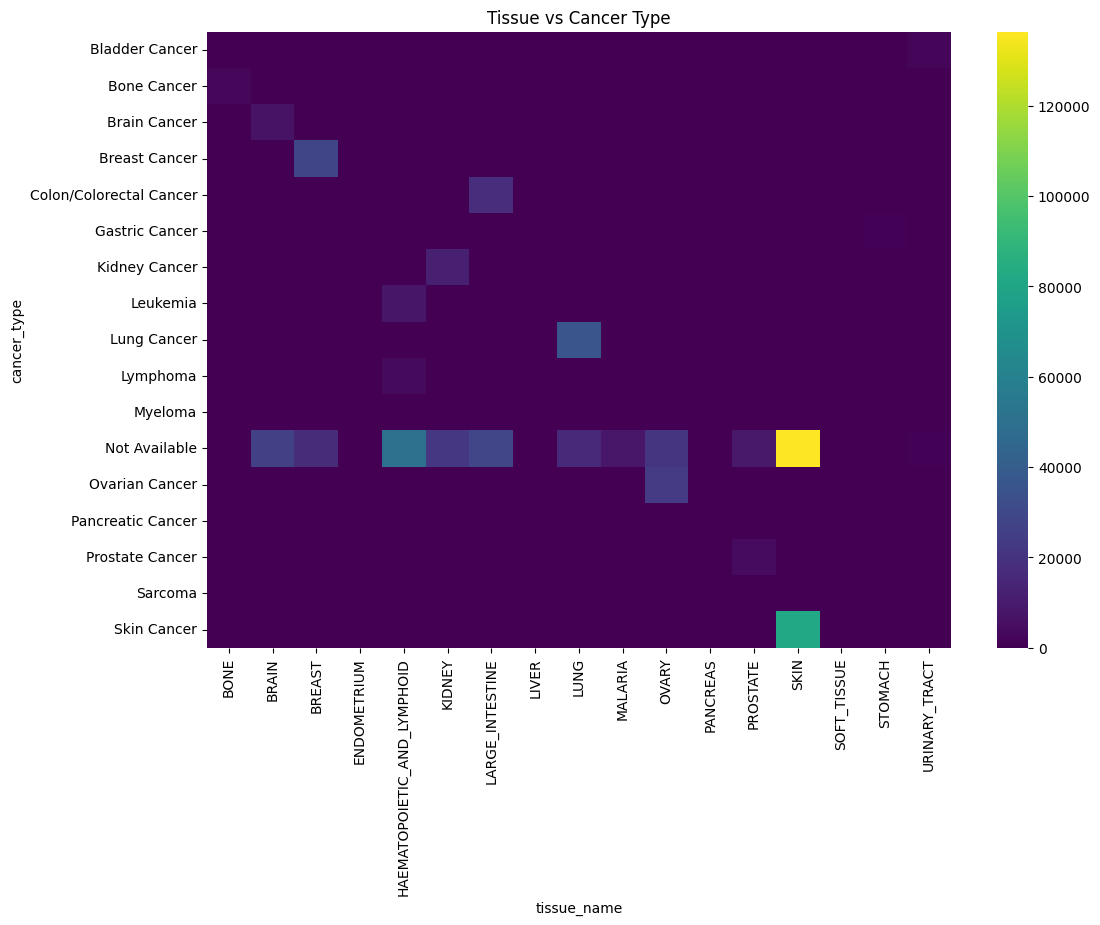

In [39]:
ct_tissue = pd.crosstab(drugcomb['cancer_type'], drugcomb['tissue_name'])
plt.figure(figsize=(12,8))
sns.heatmap(ct_tissue, cmap='viridis')
plt.title("Tissue vs Cancer Type")
plt.show()


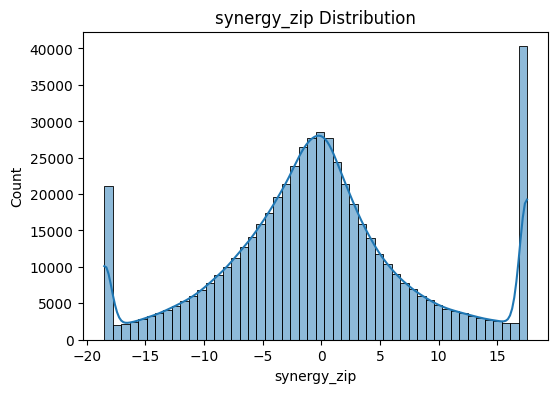

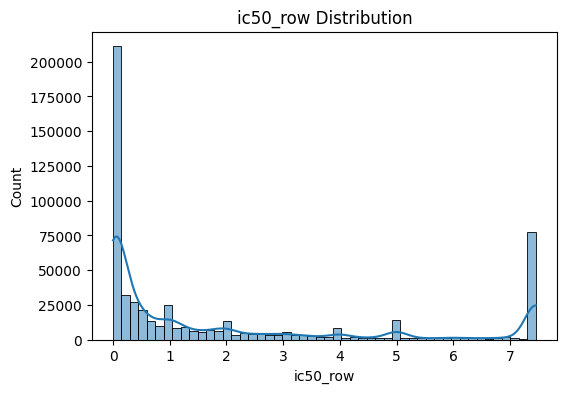

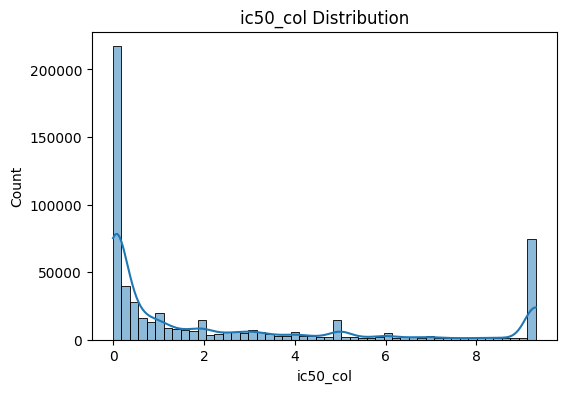

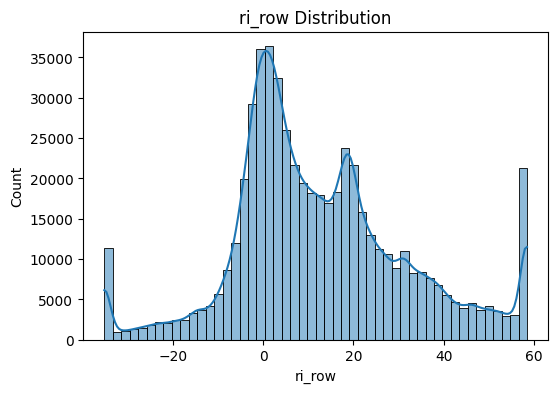

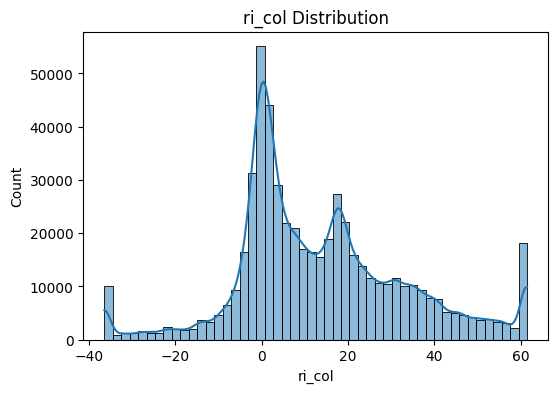

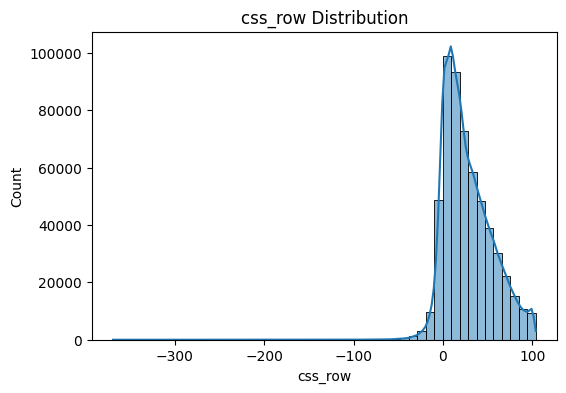

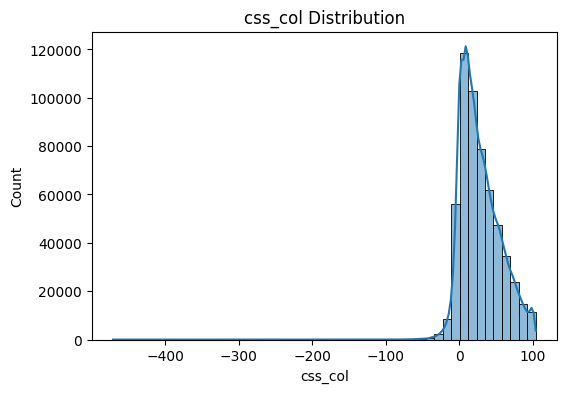

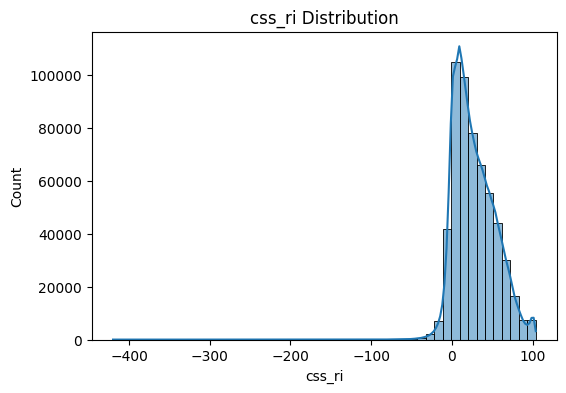

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(drugcomb[col], kde=True, bins=50)
    plt.title(f"{col} Distribution")
    plt.show()

In [41]:
synergy_cols = ['synergy_loewe', 'synergy_hsa', 'synergy_bliss']

for col in synergy_cols:
    non_numeric = drugcomb[~pd.to_numeric(drugcomb[col], errors='coerce').notna()]
    print(f"{col} non-numeric values:\n", non_numeric[col].value_counts())

synergy_loewe non-numeric values:
 synergy_loewe
\N    269
Name: count, dtype: int64
synergy_hsa non-numeric values:
 Series([], Name: count, dtype: int64)
synergy_bliss non-numeric values:
 Series([], Name: count, dtype: int64)


In [42]:
for col in synergy_cols:
    drugcomb[col] = pd.to_numeric(drugcomb[col], errors='coerce')

In [43]:
# Example: fill with median
for col in synergy_cols:
    drugcomb[col].fillna(drugcomb[col].median(), inplace=True)

C:\Users\hsbho\AppData\Local\Temp\ipykernel_19036\253252230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drugcomb[col].fillna(drugcomb[col].median(), inplace=True)
C:\Users\hsbho\AppData\Local\Temp\ipykernel_19036\253252230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


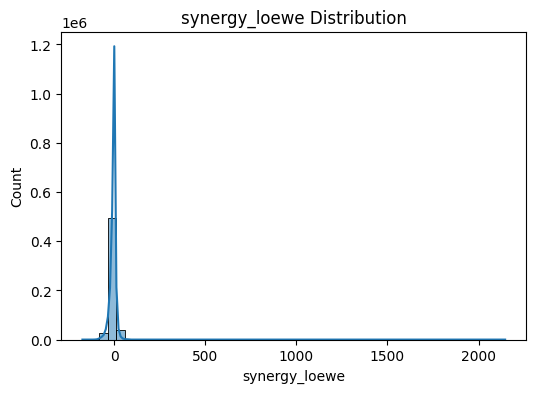

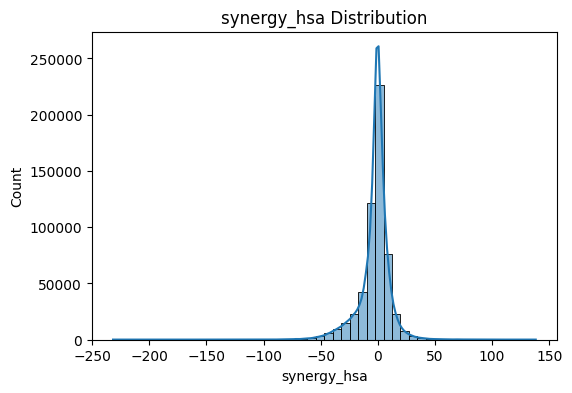

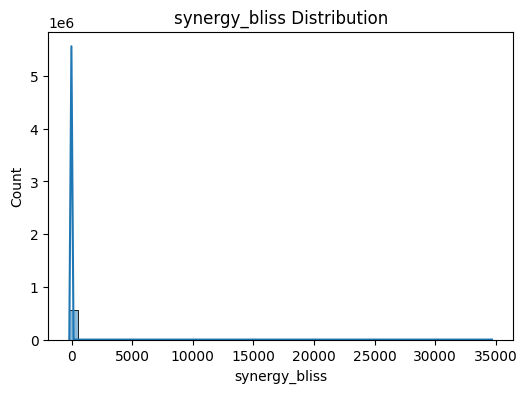

In [44]:
for col in synergy_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(drugcomb[col], kde=True, bins=50)
    plt.title(f"{col} Distribution")
    plt.show()


In [45]:
# Capping outliers using IQR method
for col in synergy_cols:
    Q1 = drugcomb[col].quantile(0.25)
    Q3 = drugcomb[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap in-place
    drugcomb[col] = drugcomb[col].clip(lower, upper)
    
    # Optional: print number of values that were capped
    num_capped = ((drugcomb[col] == lower) | (drugcomb[col] == upper)).sum()
    print(f"{col}: {num_capped} values capped")


synergy_loewe: 40870 values capped
synergy_hsa: 62232 values capped
synergy_bliss: 89160 values capped


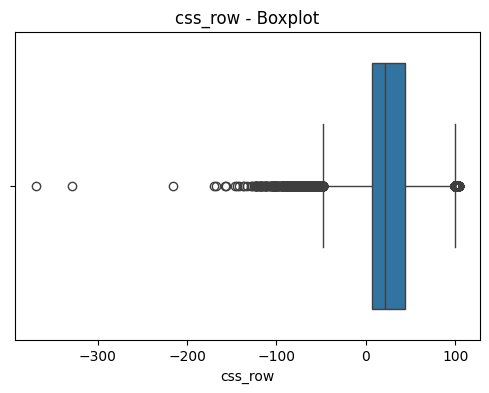

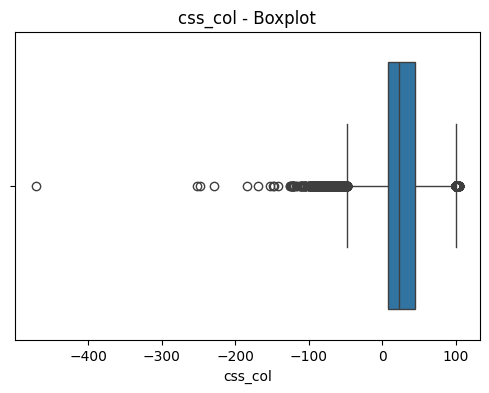

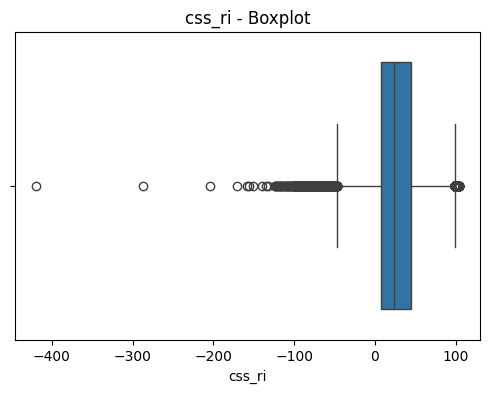

In [46]:
small_numeric_cols = ['css_row', 'css_col', 'css_ri']
for col in small_numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=drugcomb[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

In [47]:
numeric_cols_to_cap = ['ic50_row', 'ic50_col', 'ri_row', 'ri_col']

for col in numeric_cols_to_cap:
    Q1 = drugcomb[col].quantile(0.25)
    Q3 = drugcomb[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    drugcomb[col] = drugcomb[col].clip(lower, upper)

In [48]:
import pickle

drugcomb.to_pickle("drugcomb_eda.pkl")

print(" Data saved as pickle!")


 Data saved as pickle!
